<Body>   
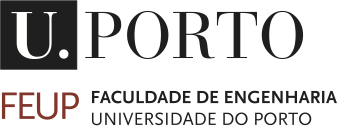   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# CNN for Image Classification in Pytorch

## Introduction
Training an image classifier with PyTorch is a task that needs to complete the following steps:

1. Load the data.
2. Define a Convolution Neural Network.
3. Define a Loss function.
4. Train the model on the training data.
5. Test the network on the test data.



# Download Dataset

CIFAR-10 includes 50,000 train and 10,000 test images. They are all natural images, in color, 32 x 32 pixels in size.  In the CIFAR10 dataset, there are ten classes of labels. It is possible to specify a particular subset of a downloaded dataset (e.g. train, val, or test). The syntax is simple and varies only a little depending on the dataset you are using. The necessary arguments to specify a particular subset of a downloaded dataset are all documented here, on the [torchvision datasets page](https://pytorch.org/vision/stable/datasets.html), for each dataset separately.

For more information:
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

* https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
#include libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define your execution device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")

The model will be running on cuda:0 device


In [ ]:
import torchvision
# For data augmentation
import torchvision.transforms as transforms

In [ ]:
# batch of images used in each backpropagation step
batch_size = 128

# to be discussed later
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])


# Training dataset  : acquire and load
cifar10_train = torchvision.datasets.CIFAR10('cifar10_root/train/', train=True, download=True, transform=transform)
# Test dataset  : acquire and load
cifar10_test = torchvision.datasets.CIFAR10('cifar10_root/test/', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 45.1MB/s]


Extracting cifar10_root/train/cifar-10-python.tar.gz to cifar10_root/train/


100%|██████████| 170M/170M [00:05<00:00, 33.2MB/s]


Extracting cifar10_root/test/cifar-10-python.tar.gz to cifar10_root/test/


Using Built-In PyTorch Image Datasets with the DataLoader Class

In [ ]:
# Dataloaders linked to datasets
trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar10_test, batch_size=batch_size, shuffle=False, num_workers=2)

#Name of classes (10 classes)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

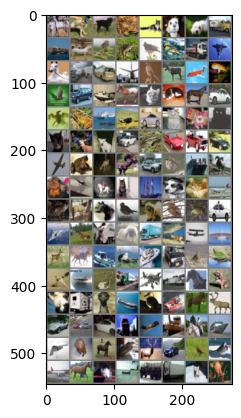

horse bird  dog   frog  cat   dog   dog   truck ship  horse bird  frog  bird  bird  truck plane horse plane truck plane bird  deer  plane frog  bird  car   ship  horse cat   cat   horse car   frog  frog  ship  bird  car   cat   dog   cat   cat   deer  dog   car   frog  car   car   car   plane frog  deer  horse car   bird  ship  deer  dog   plane horse cat   ship  dog   cat   plane cat   horse horse bird  dog   bird  frog  car   plane deer  truck dog   truck deer  plane ship  deer  horse ship  bird  ship  car   bird  frog  dog   ship  deer  truck plane truck horse dog   cat   truck bird  ship  bird  ship  horse deer  car   car   car   truck plane ship  horse ship  plane dog   horse bird  deer  car   bird  bird  plane horse horse ship  truck truck cat   deer 


In [ ]:
#Show some of the training images.
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images2
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[j]:5s}' for j in labels))

# Defining a CNN model

In PyTorch, a neural network model is defined as a class that is derived from the `nn.Module` base class. This package contains modules, extensible classes and all the required components to build neural networks.

The CNN is a feed-forward network that will process the input through all the layers during the training stage from which it will compute the loss to understand how far the predicted label of the image is falling from the correct one, and propagate the gradients back into the network to update the weights of the layers. In this way, the network will ''learn'' to set its weights to achieve the best results by iterating over a huge dataset of inputs.

The $\color{green}{forward function}$ (which needs to be declared in Pytorch) computes the value of the loss function, and the $\color{green}{backward function}$ (**does not** need to be explicitly defined in Pytorch) computes the gradients of the learnable parameters.

The following layer types can be explored in the CNN model:

* The `ReLU layer` is an activation function.
* The `BatchNorm2d` layer, which applies normalization on the inputs to have zero mean and unit variance and increase the network accuracy.
* The `MaxPool layer` will help us to ensure that the location of an object in an image will not affect the ability of the neural network to detect its specific features.
*The `Linear layer` is final layers in our network, which computes the scores of each of the classes and the label with the highest score will be the one model predicts (remember: it is a classification problem!). In the linear layer, the number of input features and the number of output features which should correspond to the number of classes must be specified.


In this example, a CNN class must define the layers in the network, and provide a forward method.


In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Conv3d(number_of_channels_(RGB), number_of_filters, kernel_size)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # Conv
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Flatten data
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Network()

# Defining a Loss function

The neural network package of Pytorch contains various loss functions for computing a value that estimates how far away the output is from the target. Loss value gives information about the model behaviour after each iteration of the optimization technique used in trainning which is a different concept from model accuracy. The accuracy of the model is calculated on the test data and shows the percentage of the right prediction.

The main objective of the training process is to reduce the loss function's value by changing the weight vector values through backpropagation in neural networks. Learning rate (lr) sets the control of how much you are adjusting the weights of our network with respect the loss gradient.


Consider the Classification loss function based on Cross-Entropy loss and an
SGD Optimizer.




In [ ]:
from torch.optim import Adam, SGD, NAdam

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9)

# Prepare the model Training


To train the model, you have to loop over our data iterator, feed the inputs to the network, and optimize. PyTorch doesn’t have a dedicated library for GPU use, but you can manually define the execution device. The device will be an Nvidia GPU if exists on your machine, or your CPU if it does not.

----------------
## Exercise 1:
Complete the training procedure, per epoch, of a CNN model. Follow the function prototype.

In [ ]:
from torch.autograd import Variable

# Function to save the model
def saveModel(model: torch.nn.Module, path: str):
    torch.save(model.state_dict(), path)

# Training function
def train(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device: torch.device,
          num_epochs: int,
          path_model: str,
          verbatim: bool):
    model.train()
    model.to(device)
    best_accuracy = 0.0
    best_loss = float('inf')
    best_epoch = 0

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        train_acc = 0.0
        train_loss = 0.0

        for ibatch, (images, labels) in enumerate(dataloader, 0):
            # Move data to the device
            images = images.to(device)
            labels = labels.to(device)

            # 1. Forward pass
            y_pred = model(images)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_pred, labels)
            train_loss += loss.item()

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()

            # Calculate and accumulate accuracy metric across all batches
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            train_acc += (y_pred_class == labels).sum().item() / len(y_pred)

        # Adjust metrics to get average loss and accuracy per batch
        train_loss = train_loss / len(dataloader)
        train_acc = train_acc / len(dataloader)

        # Save the model at the current epoch
        path = "./myModel_" + str(epoch) + ".pth"
        saveModel(model, path=path)

        # Check if the current epoch has the best accuracy
        if train_acc > best_accuracy:
            saveModel(model, path=path_model)  # Save best model to specified path
            best_loss = train_loss
            best_accuracy = train_acc
            best_epoch = epoch

            if verbatim:
                print(f'Best Epoch #{epoch} | Loss = {best_loss:.4f} | Accuracy = {best_accuracy:.4f}')

    return best_loss, best_accuracy, best_epoch

--------------------------------

# Prepare the model Testing

Now, you can test the model with batch of images from our test set.

In [ ]:
# Function to test the model with a batch of images and show the labels predictions
def testBatch(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              device: torch.device,
              verbatim):
    model.eval()
    y_pred = []
    y_true = []

    # get batch of images from the test DataLoader
    images, labels = next(iter(dataloader))

    # get the inputs
    images = Variable(images.to(device))
    labels = Variable(labels.to(device))

    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)
    outputs = F.softmax(outputs, dim=-1)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    y_pred.extend(predicted.view(-1).detach().cpu().numpy()) # Save Prediction
    y_true.extend(labels.view(-1).detach().cpu().numpy()) # Save Truth


    if verbatim :
      # Let's show the predicted labels on the screen to compare with the real ones
      print('Predicted: ',' '.join(f'{classes[j]:5s}' for j in predicted.cpu().numpy()))

      # show all images as one image grid
      imshow(torchvision.utils.make_grid(images.cpu()))

      # Show the real labels on the screen
      print('Real labels: ',' '.join(f'{classes[j]:5s}' for j in labels.cpu().numpy()))

    return y_true, y_pred


def get_predictions(model, iterator, device):
    model.eval()
    images = []
    labels = []
    probs = []
    with torch.no_grad():

        for (x, y) in iterator:
            x = x.to(device)
            y_pred  = model(x)
            y_prob = F.softmax(y_pred, dim=-1)
            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs


-------------
## Exercise 2:
Complete the testing procedure for the CNN model. Follow the function prototype.

In [ ]:
# Function to test the model with the test dataset and print the accuracy for the test images
def test(model: torch.nn.Module,
         dataloader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         device: torch.device,
         verbatim=True):

    # Put model in evaluation mode
    model.eval()
    model.to(device)

    # Initialize test loss and accuracy
    test_loss, test_acc = 0.0, 0.0
    pred_labels = []

    # Disable gradient calculation for testing
    with torch.no_grad():
        for images, labels in dataloader:
            # Move data to device
            images = images.to(device)
            labels = labels.to(device)

            # 1. Run the model on the test set to predict labels
            y_pred = model(images)

            # 2. Calculate and accumulate loss
            loss = loss_fn(y_pred, labels)
            test_loss += loss.item()

            # 3. Calculate and accumulate accuracy
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += (y_pred_class == labels).sum().item() / len(y_pred)

            # Collect predictions
            pred_labels.extend(y_pred_class.tolist())

    # Calculate average loss and accuracy per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    if verbatim:
        print(f"Loss = {test_loss:.4f}  Accuracy = {test_acc:.4f}")

    return pred_labels, test_loss, test_acc

----------------

# Training the CNN and testing the model's performance

In [ ]:
if __name__ == "__main__":

    model = model.to(device)

    # Build our model
    best_loss, best_accuracy, best_epoch = train(model=model,
                                                    dataloader=trainloader,
                                                    loss_fn=loss_fn,
                                                    optimizer=optimizer,
                                                    device=device,
                                                    num_epochs = 20,
                                                    path_model = str("./myModel_best.pth"),
                                                    verbatim = True)

Best Epoch #0 | Loss = 2.2356 | Accuracy = 0.1737
Best Epoch #1 | Loss = 1.7799 | Accuracy = 0.3484
Best Epoch #2 | Loss = 1.5466 | Accuracy = 0.4371
Best Epoch #3 | Loss = 1.4387 | Accuracy = 0.4788
Best Epoch #4 | Loss = 1.3480 | Accuracy = 0.5169
Best Epoch #5 | Loss = 1.2789 | Accuracy = 0.5435
Best Epoch #6 | Loss = 1.2153 | Accuracy = 0.5685
Best Epoch #7 | Loss = 1.1577 | Accuracy = 0.5894
Best Epoch #8 | Loss = 1.1108 | Accuracy = 0.6060
Best Epoch #9 | Loss = 1.0695 | Accuracy = 0.6230
Best Epoch #10 | Loss = 1.0416 | Accuracy = 0.6311
Best Epoch #11 | Loss = 1.0096 | Accuracy = 0.6433
Best Epoch #12 | Loss = 0.9743 | Accuracy = 0.6560
Best Epoch #13 | Loss = 0.9441 | Accuracy = 0.6685
Best Epoch #14 | Loss = 0.9180 | Accuracy = 0.6768
Best Epoch #15 | Loss = 0.8909 | Accuracy = 0.6861
Best Epoch #16 | Loss = 0.8630 | Accuracy = 0.6982
Best Epoch #17 | Loss = 0.8406 | Accuracy = 0.7039
Best Epoch #18 | Loss = 0.8190 | Accuracy = 0.7129
Best Epoch #19 | Loss = 0.7965 | Accuracy

In [ ]:
    print('Finished Training')
    # Test which classes performed well
    y_pred, test_loss, test_acc  = test(model=model,
                                        dataloader=testloader,
                                        loss_fn=loss_fn,
                                        device=device,
                                        verbatim = True)

Finished Training
Loss = 1.0475  Accuracy = 0.6397


# Loading the model

In [ ]:
    # Load the model we just created
    model = Network()
    model = model.to(device)

    path = "myModel_best.pth"
    model.load_state_dict(torch.load(path))

<ipython-input-13-6bee21abb326>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


<All keys matched successfully>

# Analyze the results

A $\color{green}{confusion\text{ } matrix}$ can be used to evaluate the performance of the classification model for 10 classes.

-------------
## Exercise 3:

Calculate the confusion matrix for the predictions obtained by the CNN model that was prepared.

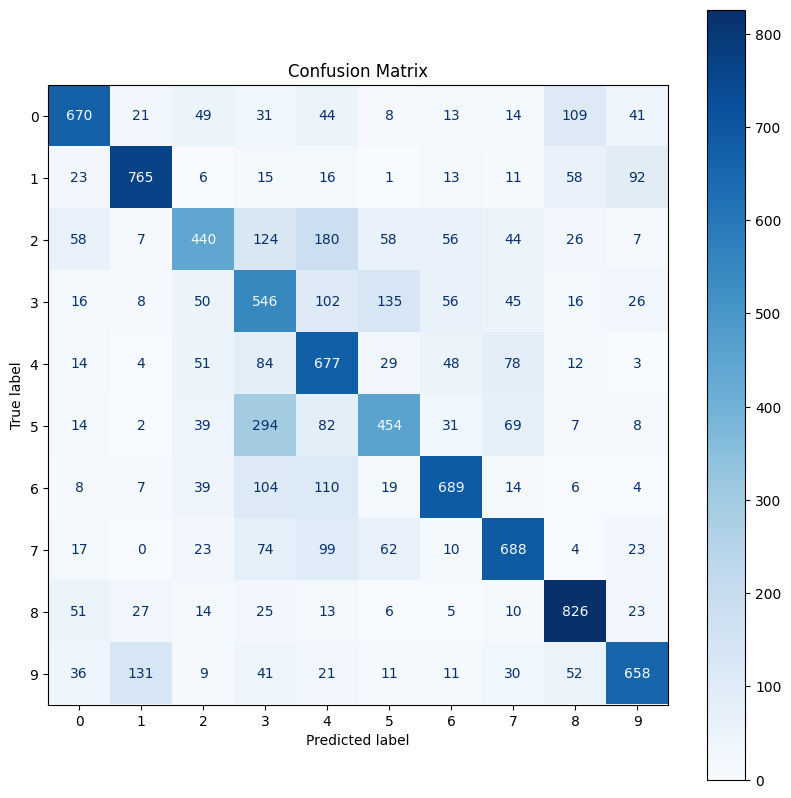

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(labels, pred_labels):
    # Calculate confusion matrix
    cm = confusion_matrix(labels, pred_labels)

    # Create a ConfusionMatrixDisplay object for easier plotting
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    cm_display.plot(values_format='d', cmap='Blues', ax=ax)
    plt.title("Confusion Matrix")
    plt.show()

# Test the model using all testset and get predictions
images, labels, probs = get_predictions(model, testloader, device)
pred_labels = torch.argmax(probs, dim=1)

# Plot the confusion matrix
plot_confusion_matrix(labels, pred_labels)

-------------------------

----------------
## Exercise 4:

A new CNN model needs to be built.

a) Implement a new CNN model with the following architecture:
1. Conv2d(... out_channels=12, kernel_size=5,...)
2. BatchNorm2d(12)
3. Conv2d(... out_channels=12, kernel_size=5, ...)
4. BatchNorm2d(12)
5. MaxPool2d(2,2)
6. Dropout2d with probability = 0.2
7. Conv2d(... out_channels=24, kernel_size=5 ...)
8. BatchNorm2d(24)
9. Conv2d(... out_channels=24, kernel_size=5...)
10. BatchNorm2d(24)
11. Linear(..., 120)
12. Linear(..., 84)
13. Linear(..., 10)

b) Train the previous model and calculate the confusion matrix for the testdataset.

c) Compare the performance of the model when trained with different optimizers eg., ADAM, SGD, NADAM.


In [ ]:
#a)

import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()e
        # First Conv Block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(12)
        # Second Conv Block
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(12)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout2d(0.2)
        # Third Conv Block
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm2d(24)
        # Fourth Conv Block
        self.conv4 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=2)
        self.bn4 = nn.BatchNorm2d(24)
        # Fully Connected Layers
        self.fc1 = nn.Linear(24 * 16 * 16, 120)  # Assuming input image size of 32x32
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = x.view(-1, 24 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = Network()



In [ ]:
model = model.to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9)

In [ ]:
#b)

# train
best_loss, best_accuracy, best_epoch = train(model=model,
                                            dataloader=trainloader,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer,
                                            device=device,
                                            num_epochs = 20,
                                            path_model = str("./myModel_best.pth"),
                                            verbatim = True)

Best Epoch #0 | Loss = 1.6565 | Accuracy = 0.3888
Best Epoch #1 | Loss = 1.2675 | Accuracy = 0.5435
Best Epoch #2 | Loss = 1.0996 | Accuracy = 0.6077
Best Epoch #3 | Loss = 0.9787 | Accuracy = 0.6557
Best Epoch #4 | Loss = 0.9054 | Accuracy = 0.6775
Best Epoch #5 | Loss = 0.8340 | Accuracy = 0.7058
Best Epoch #6 | Loss = 0.7843 | Accuracy = 0.7222
Best Epoch #7 | Loss = 0.7249 | Accuracy = 0.7452
Best Epoch #8 | Loss = 0.6815 | Accuracy = 0.7630
Best Epoch #9 | Loss = 0.6298 | Accuracy = 0.7789
Best Epoch #10 | Loss = 0.5854 | Accuracy = 0.7943
Best Epoch #11 | Loss = 0.5401 | Accuracy = 0.8094
Best Epoch #12 | Loss = 0.4952 | Accuracy = 0.8260
Best Epoch #13 | Loss = 0.4540 | Accuracy = 0.8395
Best Epoch #14 | Loss = 0.4153 | Accuracy = 0.8534
Best Epoch #15 | Loss = 0.3785 | Accuracy = 0.8673
Best Epoch #16 | Loss = 0.3388 | Accuracy = 0.8821
Best Epoch #17 | Loss = 0.3043 | Accuracy = 0.8934
Best Epoch #18 | Loss = 0.2853 | Accuracy = 0.8996
Best Epoch #19 | Loss = 0.2562 | Accuracy

------------
# Data Augmentation

$\color{yellow}{The \text{ }curse\text{ } of\text{ } data}$:
deep learning models require a large amount of data for training in order to obtain good performances. Acquiring large datasets is costly and challenging (e.g., manual annotations).

Data augmentation involves techniques used for increasing the amount of data. These techniques apply different modifications to images in order to expand the number of samples in the original dataset.

> Data augmentation has two main objectives:
1. gowing the dataset.
2. increasing the diversity of the dataset.


There are multiple ways of performing data augmentation but is not clear what is the most effective way to do it.

$\color{green}{Image\text{ } Augmentation\text{ } techniques}:$
* Resize
* Gray Scale
* Normalize
* Random Rotation
* Center Crop
* Random Crop
* Gaussian Blur
* Gaussian Noise
* Random Blocks
* Central Region
* ...




## Data augmentation in Pytorch

Augmenting data with PyTorch is possible due to Torchvision package which provides several transforms that can be applied in [`torchvision.transforms`](https://pytorch.org/vision/main/transforms.html).

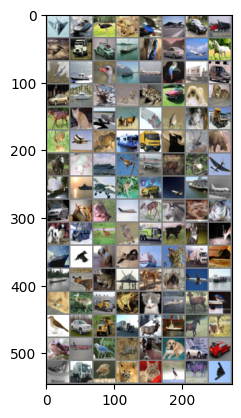

plane ship  bird  frog  bird  plane car   truck deer  truck car   ship  bird  car   plane horse plane ship  bird  ship  plane bird  truck car   car   ship  deer  dog   frog  car   dog   cat   horse cat   plane deer  truck bird  dog   truck deer  plane frog  ship  truck cat   deer  deer  horse dog   ship  bird  plane deer  deer  plane truck ship  plane deer  car   plane ship  plane car   cat   bird  plane deer  horse dog   frog  dog   truck deer  bird  truck dog   cat   deer  ship  bird  dog   cat   ship  bird  truck cat   ship  deer  frog  plane dog   dog   plane ship  bird  bird  truck frog  cat   ship  deer  bird  bird  car   truck truck deer  ship  horse deer  frog  plane bird  frog  dog   dog   car   car   cat   truck bird  dog   cat   bird  deer  plane


In [ ]:
#dataiter = iter(trainloader)
#images, labels = dataiter.next()

dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[j]:5s}' for j in labels))

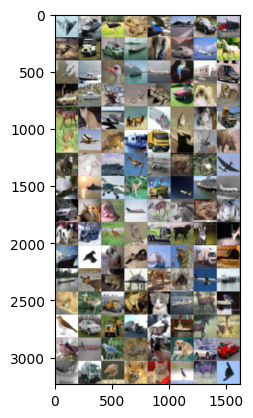

In [ ]:
# Resizing images to 200x200
resized_imgs = transforms.Resize(size=[200, 200])(images)
# show images
imshow(torchvision.utils.make_grid(resized_imgs))

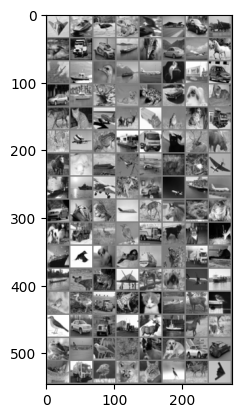

In [ ]:
# Convert to Grayscale image
gray_imgs = transforms.Grayscale()(images)
# show images
imshow(torchvision.utils.make_grid(gray_imgs))

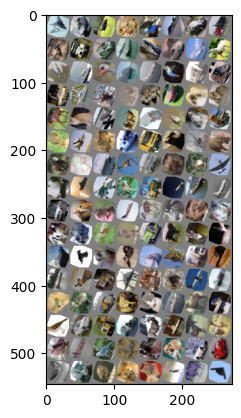

In [ ]:
# Random Rotation between a range
rrotated_imgs = transforms.RandomRotation(degrees=(-90, 90))(images)
# show images
imshow(torchvision.utils.make_grid(rrotated_imgs))

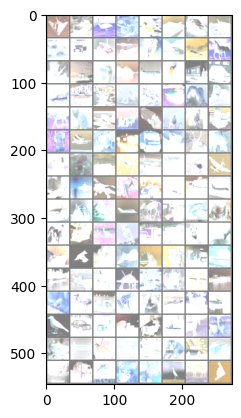

In [ ]:
# Inverts the colors of the given image randomly
rinvert_imgs = transforms.RandomInvert(0.9)(images)
# show images
imshow(torchvision.utils.make_grid(rinvert_imgs))

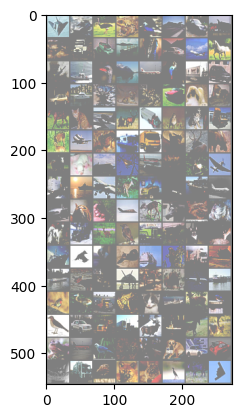

In [ ]:
# Adjust the sharpness of the image randomly with a given probability.
rsharp_imgs = transforms.RandomAdjustSharpness(2, 0.9)(images)
# show images
imshow(torchvision.utils.make_grid(rsharp_imgs))

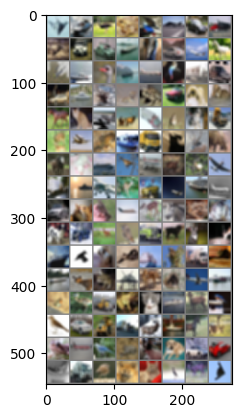

In [ ]:
# Gaussian blur transform to the image using a Gaussian kernel.
blur_imgs = transforms.GaussianBlur(kernel_size=(5, 5), sigma=3)(images)
# show images
imshow(torchvision.utils.make_grid(blur_imgs))


Data augmentation usually needs several transformations that can be putted together using [`torchvision.transforms.Compose`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html) and then passed as a list. The transforms are applied following the list order to the original images at every batch generation. Therefore, the training dataset is left unchanged since only the batch images are copied and transformed every iteration.


> The [`transforms.ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) converts images to a PyTorch Tensor and [`transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) normalizes images. Both are often used **during the training step**.

----------------
## Exercise 5:

Prepare the transformations to be applied on CIFAR dataset for data augmentation:
 * ColorJitter
 * RandomHorizontalFlip
 * GaussianBlur
 * RandomVerticalFlip
 * RandomRotation

In [ ]:
import PIL
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(17)

# Define the augmentation pipeline
transforms_augmented = torchvision.transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),           # Randomly flip images horizontally
    transforms.RandomVerticalFlip(p=0.5),             # Randomly flip images vertically
    transforms.RandomRotation(degrees=15),            # Random rotation within a range of ±15 degrees
    transforms.ColorJitter(brightness=0.2,            # Randomly adjust brightness
                           contrast=0.2,              # Randomly adjust contrast
                           saturation=0.2,            # Randomly adjust saturation
                           hue=0.1),                  # Randomly adjust hue
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),  # Apply Gaussian blur
    transforms.ToTensor(),                            # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

The `transforms` are passed to `torchvision.datasets.ImageFolder` which will automatically augment images.

In [ ]:
#dataset_augmented = torchvision.datasets.ImageFolder('path_dataset/data/', transform=transforms)
cifar_trainset_augmented = torchvision.datasets.CIFAR10('cifar10_root/train_augmented/', train=True, download=True, transform=transforms_augmented)

Files already downloaded and verified


Visualizing a batch of augmented images:

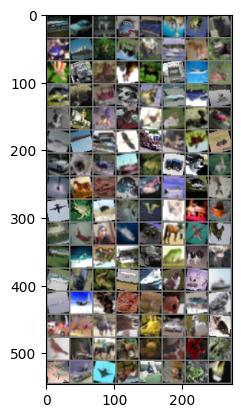

plane car   ship  car   car   deer  bird  cat   car   ship  deer  horse dog   ship  dog   cat   bird  truck deer  horse horse truck plane dog   car   deer  horse dog   deer  plane car   deer  dog   horse deer  cat   horse dog   deer  car   ship  ship  car   bird  truck truck horse bird  car   cat   bird  ship  deer  truck truck horse bird  horse frog  car   dog   ship  car   deer  plane frog  bird  frog  bird  plane truck frog  ship  cat   cat   ship  cat   horse plane horse car   plane truck truck car   frog  dog   deer  plane bird  frog  plane ship  dog   deer  ship  ship  plane dog   frog  deer  dog   car   cat   truck deer  horse cat   frog  car   bird  cat   bird  bird  horse horse frog  dog   cat   frog  plane car   plane horse horse bird  frog  bird 


In [ ]:
#Dataloader for Augmented dataset
trainloader_aug = torch.utils.data.DataLoader(cifar_trainset_augmented, batch_size=batch_size, shuffle=True, num_workers=2)

# get some random training images
dataiter = iter(trainloader_aug)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[j]:5s}' for j in labels))

## Training the model with data augmentation

The model can be (re)trained using the `trainloader_aug` dataloader.

In [ ]:
# Load the model we just created
model_aug = Network()
model_aug = model.to(device)

# Train our model using the "trainloader"
best_loss, best_accuracy, best_epoch = train(model=model_aug,
                                                    dataloader=trainloader,
                                                    loss_fn=loss_fn,
                                                    optimizer=optimizer,
                                                    device=device,
                                                    num_epochs = 20,
                                                    path_model = str("./myModel_best_aug.pth"),
                                                    verbatim = True)

# Load best model
model_aug.load_state_dict(torch.load("myModel_best_aug.pth"))

# Train our model using the "trainloader_aug"
best_loss, best_accuracy, best_epoch = train(model=model_aug,
                                                    dataloader=trainloader_aug,
                                                    loss_fn=loss_fn,
                                                    optimizer=optimizer,
                                                    device=device,
                                                    num_epochs = 20,
                                                    path_model = str("./myModel_best_aug.pth"),
                                                    verbatim = True)


print('Finished Training')

Best Epoch #0 | Loss = 0.1686 | Accuracy = 0.9441
Best Epoch #1 | Loss = 0.0669 | Accuracy = 0.9784
Best Epoch #2 | Loss = 0.0528 | Accuracy = 0.9836
Best Epoch #3 | Loss = 0.0500 | Accuracy = 0.9838
Best Epoch #4 | Loss = 0.0479 | Accuracy = 0.9845
Best Epoch #7 | Loss = 0.0463 | Accuracy = 0.9849
Best Epoch #8 | Loss = 0.0454 | Accuracy = 0.9851
Best Epoch #9 | Loss = 0.0429 | Accuracy = 0.9857
Best Epoch #13 | Loss = 0.0412 | Accuracy = 0.9866
Best Epoch #14 | Loss = 0.0377 | Accuracy = 0.9874
Best Epoch #18 | Loss = 0.0364 | Accuracy = 0.9881


<ipython-input-40-70eccd6429d9>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_aug.load_state_dict(torch.load("myModel_best_aug.pth"))


Best Epoch #0 | Loss = 1.5023 | Accuracy = 0.4781
Best Epoch #1 | Loss = 1.2746 | Accuracy = 0.5462
Best Epoch #2 | Loss = 1.2038 | Accuracy = 0.5764
Best Epoch #3 | Loss = 1.1553 | Accuracy = 0.5941
Best Epoch #4 | Loss = 1.1320 | Accuracy = 0.5997
Best Epoch #5 | Loss = 1.1083 | Accuracy = 0.6116
Best Epoch #6 | Loss = 1.0859 | Accuracy = 0.6166
Best Epoch #7 | Loss = 1.0667 | Accuracy = 0.6244
Best Epoch #8 | Loss = 1.0561 | Accuracy = 0.6259
Best Epoch #9 | Loss = 1.0361 | Accuracy = 0.6366
Best Epoch #10 | Loss = 1.0271 | Accuracy = 0.6375
Best Epoch #11 | Loss = 1.0129 | Accuracy = 0.6428
Best Epoch #12 | Loss = 1.0017 | Accuracy = 0.6455
Best Epoch #13 | Loss = 0.9908 | Accuracy = 0.6513
Best Epoch #14 | Loss = 0.9857 | Accuracy = 0.6548
Best Epoch #15 | Loss = 0.9786 | Accuracy = 0.6549
Best Epoch #16 | Loss = 0.9679 | Accuracy = 0.6597
Best Epoch #17 | Loss = 0.9648 | Accuracy = 0.6606
Best Epoch #18 | Loss = 0.9578 | Accuracy = 0.6652
Best Epoch #19 | Loss = 0.9414 | Accuracy

<ipython-input-39-3ad450f16ca7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_aug.load_state_dict(torch.load("myModel_best_aug.pth"))


Loss = 1.0741  Accuracy = 0.6431


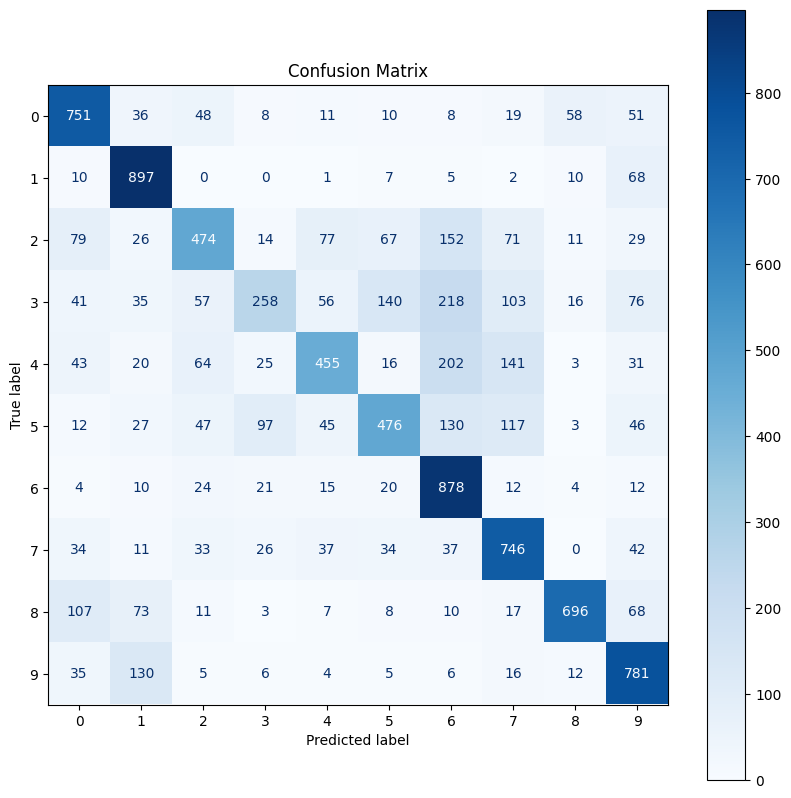

In [ ]:
# Load best model
model_aug.load_state_dict(torch.load("myModel_best_aug.pth"))


# Test which classes performed well
y_pred, test_loss, test_acc  = test(model=model_aug,
                                    dataloader=testloader,
                                    loss_fn=loss_fn,
                                    device=device,
                                    verbatim = True)

# Test the model using all testset
images, labels, probs = get_predictions(model_aug, testloader,  device)
pred_labels = torch.argmax(probs, 1)

# Print Confusion Matrix
plot_confusion_matrix(labels, pred_labels)